# Importing dataset:

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('salaries.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [5]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [6]:
#checking null values in dataframe:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

There are no null values

In [7]:
#checking datatypes of columns
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

'salary' has continuous data and its in int64 type

# making dataframe for the nominal data:

In [35]:
df_visual_nominal=df[['rank', 'discipline', 'sex']].copy()

In [36]:
df_visual_nominal.columns

Index(['rank', 'discipline', 'sex'], dtype='object')

# Visualization of data:

In [38]:
import seaborn as sns

Male      358
Female     39
Name: sex, dtype: int64


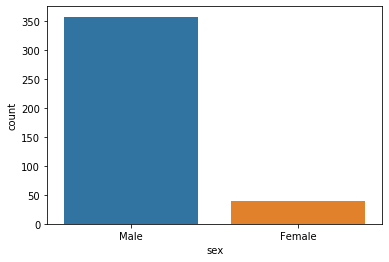

In [39]:
a=sns.countplot(x='sex',data=df_visual_nominal)
print(df_visual_nominal['sex'].value_counts())

total number of males are 358 and females are 39

B    216
A    181
Name: discipline, dtype: int64


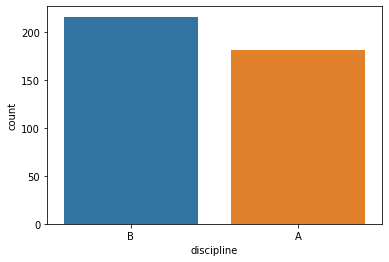

In [40]:
b=sns.countplot(x='discipline',data=df_visual_nominal)
print(df_visual_nominal['discipline'].value_counts())

in discipline column rank B is for 216 employees and rank A is for 181 employees

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64


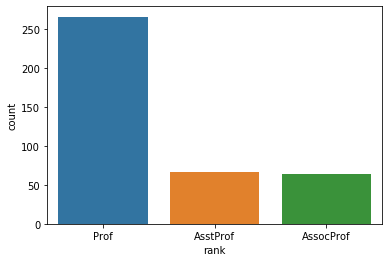

In [41]:
c=sns.countplot(x='rank',data=df_visual_nominal)
print(df_visual_nominal['rank'].value_counts())

there are 266 prof, 67 AsstProf and 64 AssocProf

# checking the distribution of continuous value

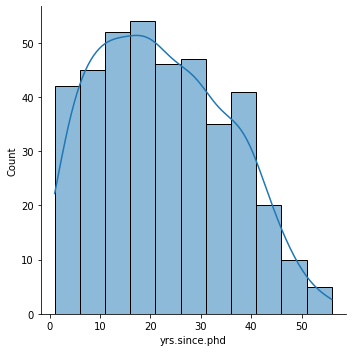

In [46]:
d=sns.displot(x='yrs.since.phd',data=df,kde=True)

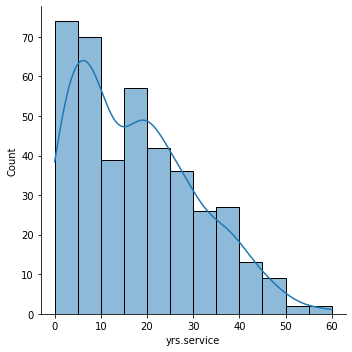

In [47]:
e=sns.displot(x='yrs.service',data=df,kde=True)

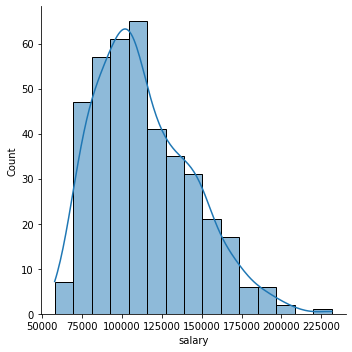

In [48]:
f=sns.displot(x='salary',data=df,kde=True)

# Encoding of dataframe:

In [49]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [50]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [51]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [52]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


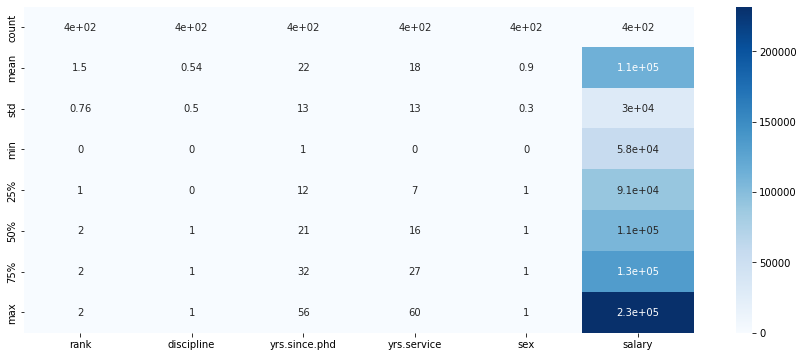

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
sns.heatmap(df.describe(), annot=True,cmap='Blues')

# correlation of columns with target columns:

In [58]:
df.corr()['salary'].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.522207
salary           1.000000
Name: salary, dtype: float64

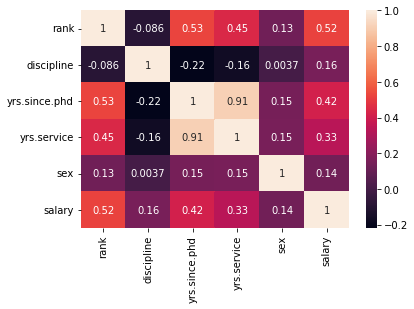

In [59]:
sns.heatmap(df.corr(),annot=True)

salary has maximum correlated with rank then with yrs.since.phd and then with yrs.services

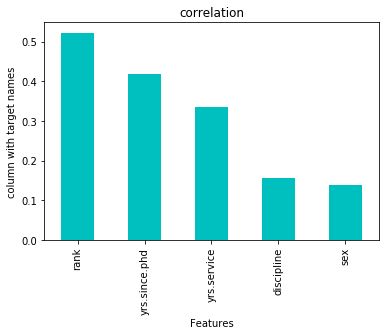

In [60]:
df.corr()['salary'].sort_values(ascending=False).drop(['salary']).plot(kind='bar',color='c')
plt.xlabel('Features')
plt.ylabel('column with target names')
plt.title('correlation')
plt.show()

In [62]:
#checking skewness
df.skew().sort_values()

sex             -2.709958
rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

sex,rank and discipline are categorical. 
No skewness 

In [65]:
#checking outliers
df.dtypes

rank             float64
discipline       float64
yrs.since.phd      int64
yrs.service        int64
sex              float64
salary             int64
dtype: object

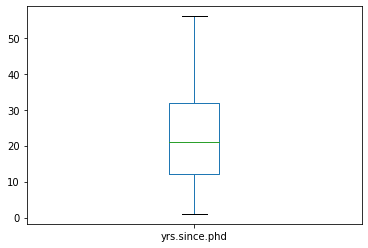

In [68]:
df['yrs.since.phd'].plot.box()

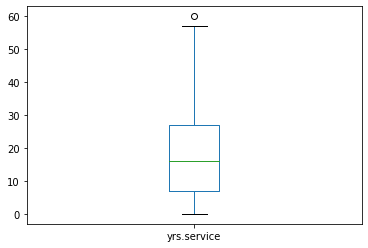

In [69]:
df['yrs.service'].plot.box()

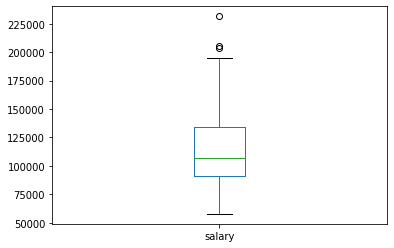

In [71]:
df['salary'].plot.box()

hardly any outliers present.

# Separating the columns into features and target:

In [76]:
features=df.drop('salary',axis=1)
target=df['salary']

# Scaling the data using min-max scaler:

In [77]:
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [78]:
import warnings
warnings.filterwarnings('ignore')

In [79]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=1)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(target_train,pred_train)}")
    print(f"At random state {i},the training accuracy is:- {r2_score(target_test,pred_test)}")
          
    print("\n")   

At random state 0,the training accuracy is:- 0.3604245854198438
At random state 0,the training accuracy is:- 0.4163364187662941


At random state 1,the training accuracy is:- 0.3604245854198438
At random state 1,the training accuracy is:- 0.4163364187662941


At random state 2,the training accuracy is:- 0.3604245854198438
At random state 2,the training accuracy is:- 0.4163364187662941


At random state 3,the training accuracy is:- 0.3604245854198438
At random state 3,the training accuracy is:- 0.4163364187662941


At random state 4,the training accuracy is:- 0.3604245854198438
At random state 4,the training accuracy is:- 0.4163364187662941


At random state 5,the training accuracy is:- 0.3604245854198438
At random state 5,the training accuracy is:- 0.4163364187662941


At random state 6,the training accuracy is:- 0.3604245854198438
At random state 6,the training accuracy is:- 0.4163364187662941


At random state 7,the training accuracy is:- 0.3604245854198438
At random state 7,the trai

In [80]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)

In [81]:
lr.fit(features_train,target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
pred_test=lr.predict(features_test)

In [83]:
print(r2_score(target_test,pred_test))

0.3439703329785656


# Cross-Validation of the model:

In [84]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fols{j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fols2 the cv score is 0.32708011674065113 and accuracy score for training is -0.48920140471764695 and accuracy for the testing is 0.3439703329785656


At cross fols3 the cv score is 0.3203328673059879 and accuracy score for training is -0.48920140471764695 and accuracy for the testing is 0.3439703329785656


At cross fols4 the cv score is 0.32181966937683587 and accuracy score for training is -0.48920140471764695 and accuracy for the testing is 0.3439703329785656


At cross fols5 the cv score is 0.29569928663871736 and accuracy score for training is -0.48920140471764695 and accuracy for the testing is 0.3439703329785656


At cross fols6 the cv score is 0.3309634183929555 and accuracy score for training is -0.48920140471764695 and accuracy for the testing is 0.3439703329785656


At cross fols7 the cv score is 0.3257704419996535 and accuracy score for training is -0.48920140471764695 and accuracy for the testing is 0.3439703329785656


At cross fols8 the cv score is 0.3310060584

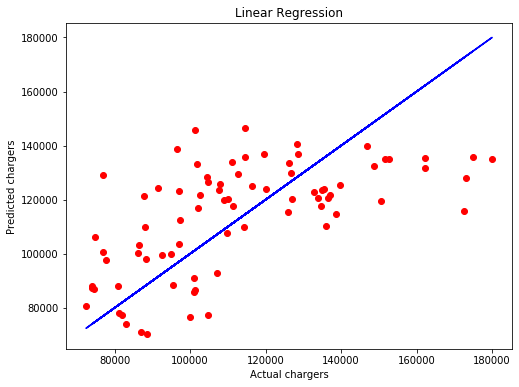

In [86]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test, y=pred_test, color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual chargers')
plt.ylabel('Predicted chargers')
plt.title('Linear Regression')
plt.savefig('lr.png')
plt.show()

# Regularization:

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [88]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,0.1,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [89]:
#final model training
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(features_train,target_train)
ls_score_training=ls.score(features_train,target_train)
pred_ls=ls.predict(features_test)
ls_score_training*100

37.67666823112948

In [90]:
pred_ls=ls.predict(features_test)

In [91]:
lss=r2_score(target_test,pred_ls)
lss*100

34.397033198422456

In [95]:
cv_score=cross_val_score(ls,features,target,cv=2)
cv_mean=cv_score.mean()
cv_mean*100

32.70801199483702

# Ensemble technique:

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}

rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [97]:
rf=RandomForestRegressor(criterion='mae',max_features='auto')
rf.fit(features_train,target_train)
train_r2=rf.score(features_train,target_train)
pred_decision=rf.predict(features_test)
print('Training r2',train_r2)
rfs=r2_score(target_test,pred_decision)
print("R2Score:",rfs*100)


Training r2 0.8520347132660453
R2Score: 31.674969206381043


we are getting model accuracy just 31.67%

In [98]:
import pickle
filename='salary.project.pkl'
pickle.dump(rf,open(filename,'wb'))

# conclusion:

In [100]:
loaded_model=pickle.load(open('salary.project.pkl','rb'))
result=loaded_model.score(features_test,target_test)
print(result*100)

31.674969206381043


In [101]:
conclusion=pd.DataFrame([loaded_model.predict(features_test)[:],pred_decision[:]],index=['predicted','original'])
conclusion.transpose()

,predicted,original
0,154024.955,154024.955
1,110622.640,110622.640
2,161503.310,161503.310
3,139853.440,139853.440
4,85591.765,85591.765
...,...,...
75,79912.550,79912.550
76,106588.850,106588.850
77,79014.575,79014.575
78,137852.505,137852.505
